In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score#import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df=pd.read_csv('fordTrain.csv')
df1=pd.read_csv('fordTest.csv')

df=df.drop(['P8','V7','V9'],axis=1)
df1=df1.drop(['P8','V7','V9'],axis=1)
#df=df.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1) 
#df1=df1.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1)

Y_train=df.ix[:,'IsAlert'].copy()
X_train=df.drop(['IsAlert'],axis=1)

Y_test=df1.ix[:,'IsAlert'].copy()
X_test=df1.drop(['IsAlert'],axis=1)

In [33]:
Y2=Y_train.to_frame()

In [10]:
df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.0,101.96,0.175,752,5.99375,0,2005,13.4,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.0,101.98,0.455,752,5.99375,0,2007,13.4,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.0,101.97,0.280,752,5.99375,0,2011,13.4,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.0,101.99,0.070,752,5.99375,0,2015,13.4,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.0,102.07,0.175,752,5.99375,0,2017,13.4,4,14.7757


In [11]:
df['IsAlert'].value_counts()

1    349785
0    254544
Name: IsAlert, dtype: int64

In [2]:
X_train['E5_std']=np.std(X_train['E5'])
X_test['E5_std']=np.std(X_test['E5'])
X_train['E5_mean']=np.mean(X_train['E5'])
X_test['E5_mean']=np.mean(X_train['E5'])
X_train['E7_std']=np.std(X_train['E5'])
X_test['E7_std']=np.std(X_test['E5'])
X_train['E7_mean']=np.mean(X_train['E5'])
X_test['E7_mean']=np.mean(X_train['E5'])
X_train['E9_std']=np.std(X_train['E5'])
X_test['E9_std']=np.std(X_test['E5'])
X_train['E9_mean']=np.mean(X_train['E5'])
X_test['E9_mean']=np.mean(X_train['E5'])
X_train['E10_std']=np.std(X_train['E5'])
X_test['E10_std']=np.std(X_test['E5'])
X_train['E10_mean']=np.mean(X_train['E5'])
X_test['E10_mean']=np.mean(X_train['E5'])
X_train['E5_std']=np.std(X_train['E5'])
X_test['E5_std']=np.std(X_test['E5'])
X_train['E5_mean']=np.mean(X_train['E5'])
X_test['E5_mean']=np.mean(X_train['E5'])
X_train['E5_std']=np.std(X_train['E5'])
X_test['E5_std']=np.std(X_test['E5'])
X_train['E5_mean']=np.mean(X_train['E5'])
X_test['E5_mean']=np.mean(X_train['E5'])

In [3]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E5'])
    std=np.std(X_temp['E5'])
    X_train.ix[X_train['TrialID']==i,'E5_mean']=mean
    X_train.ix[X_train['TrialID']==i,'E5_std']=std

In [4]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E7'])
    std=np.std(X_temp['E7'])
    X_train.ix[X_train['TrialID']==i,'E7_mean']=mean
    X_train.ix[X_train['TrialID']==i,'E7_std']=std

In [5]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E9'])
    std=np.std(X_temp['E9'])
    X_train.ix[X_train['TrialID']==i,'E9_mean']=mean
    X_train.ix[X_train['TrialID']==i,'E9_std']=std

In [6]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E10'])
    std=np.std(X_temp['E10'])
    X_train.ix[X_train['TrialID']==i,'E10_mean']=mean
    X_train.ix[X_train['TrialID']==i,'E10_std']=std

In [7]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V1'])
    std=np.std(X_temp['V1'])
    X_train.ix[X_train['TrialID']==i,'V1_mean']=mean
    X_train.ix[X_train['TrialID']==i,'V1_std']=std

In [ ]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V11'])
    std=np.std(X_temp['V11'])
    X_train.ix[X_train['TrialID']==i,'V11_mean']=mean
    X_train.ix[X_train['TrialID']==i,'V11_std']=std

In [8]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E5'])
    std=np.std(X_temp['E5'])
    X_test.ix[X_test['TrialID']==i,'E5_mean']=mean
    X_test.ix[X_test['TrialID']==i,'E5_std']=std

In [9]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E7'])
    std=np.std(X_temp['E7'])
    X_test.ix[X_test['TrialID']==i,'E7_mean']=mean
    X_test.ix[X_test['TrialID']==i,'E7_std']=std

In [ ]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E9'])
    std=np.std(X_temp['E9'])
    X_test.ix[X_test['TrialID']==i,'E9_mean']=mean
    X_test.ix[X_test['TrialID']==i,'E9_std']=std

In [ ]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E10'])
    std=np.std(X_temp['E10'])
    X_test.ix[X_test['TrialID']==i,'E10_mean']=mean
    X_test.ix[X_test['TrialID']==i,'E10_std']=std

In [ ]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V1'])
    std=np.std(X_temp['V1'])
    X_test.ix[X_test['TrialID']==i,'V1_mean']=mean
    X_test.ix[X_test['TrialID']==i,'V1_std']=std

In [ ]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V11'])
    std=np.std(X_temp['V11'])
    X_test.ix[X_test['TrialID']==i,'V11_mean']=mean
    X_test.ix[X_test['TrialID']==i,'V11_std']=std

In [ ]:
#X_train.ix[X_train['TrialID']==0,'E5_std']=0

In [19]:
#X_train1=X_train.ix[:,['E7','E9','E10','V11','V1','E5_std','V10']].copy()
#X_test1=X_test.ix[:,['E7','E9','E10','V11','V1','E5_std','V10']].copy()
X_train1=X_train.ix[:,['E7_mean','E7_std','E9','E10','V1','V11']].copy()
X_test1=X_test.ix[:,['E7_std','E7_std','E9','E10','V1','V11']].copy()

In [20]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
parameters = { 'C':[1, 10]}
model = GridSearchCV(clf, parameters,cv=10,scoring='roc_auc')

In [21]:
model.fit(X_train1,Y_train)
print("train accuracy => ",accuracy_score(model.predict(X_train1),Y_train))
print("test accuracy => ",accuracy_score(model.predict(X_test1),Y_test))

train accuracy =>  0.771730299224
test accuracy =>  0.882000993049


In [22]:
Y_pred_prob=model.predict_proba(X_test1)[:,1]

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_prob)

0.81281997534284645

In [24]:
def specandsens(a):
    sens=a[1][1]/(a[1][1]+a[1][0])
    spec=a[0][0]/(a[0][0]+a[0][1])
    return spec,sens

In [25]:
confmatrix=confusion_matrix(Y_test, model.predict(X_test1))
spec,sens=specandsens(confmatrix)
print(f'specificity is {spec} and sensitivity is {sens}')

specificity is 0.5282142140803637 and sensitivity is 0.9983942986604492


In [17]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [18]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_prob)
roc_auc = auc(fpr, tpr)

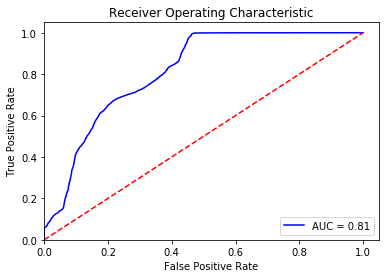

In [66]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#plt.savefig('roc.png')